In [2]:
import os, sys, time, copy, pickle as pkl
import numpy as np
import pandas as pd
import itertools
import torch

import matplotlib.pyplot as plt
import seaborn as sns

import plotting_utils as utils

import importlib

%matplotlib inline 

In [3]:
ds_model = "gldv2_resnetgn"

# fn = utils.get_pfl_finetune_all_fn(ds_model, "adapter", "pfl_joint", "pretrained", "stateful")
# print(fn)
# out = utils.load_pkl(fn)
# print(out)

# fn = utils.get_fedavg_finetune_all_fn(ds_model, "finetune")
# print(fn)
# out = utils.load_pkl(fn)
# print(out)

# fn = utils.get_pfl_finetune_fn(ds_model, "adapter", "pfl_joint", "pretrained", "stateful") 
# df = pd.read_csv(fn)
# df.head(5)

# fn = utils.get_fedavg_finetune_fn(ds_model, "finetune")
# df = pd.read_csv(fn)
# df.head(5)


In [12]:
args = dict(
    init = "pretrained", state = "stateful", ne_finetune=5, ne_pfl=1, 
    use_unweighted_stats = False, finetune_pfl_joint = False,
)

ds_and_model = ["emnist_resnetgn", "gldv2b_resnetgn", "so_mini"][0]
df, dfs = utils.get_main_pertask_table(ds_and_model, **args)
df2 = utils.convert_to_string_and_bold(df, dfs, do_bold=True)
df2 = utils.rename_main_table_per_task(df2)
df, dfs = utils.rename_main_table_per_task(df), utils.rename_main_table_per_task(dfs)

df

Mean Accuracy \%                      \
                         Finetune    PFL-AM    PFL-SU   
Non-personalized         0.931754  0.931754  0.931754   
Input Layer              0.932896  0.935249  0.934324   
Output Layer             0.933658   0.93498  0.934599   
Adapter                  0.936566  0.939485  0.937455   

                 10th Percentile Accuracy \%                      
                                    Finetune    PFL-AM    PFL-SU  
Non-personalized                    0.861111  0.861111  0.861111  
Input Layer                         0.862069  0.865017  0.862382  
Output Layer                        0.862069  0.865281  0.863501  
Adapter                              0.86893  0.878492  0.873387

In [13]:
df2

Mean Accuracy \%                                           \
                         Finetune                   PFL-AM          PFL-SU   
Non-personalized          $93.18$                  $93.18$         $93.18$   
Input Layer               $93.29$  $\mathbf{93.52}_{0.04}$  $93.43_{0.04}$   
Output Layer              $93.37$  $\mathbf{93.50}_{0.04}$  $93.46_{0.04}$   
Adapter                   $93.66$  $\mathbf{93.95}_{0.02}$  $93.75_{0.02}$   

                 10th Percentile Accuracy \%                           \
                                    Finetune                   PFL-AM   
Non-personalized                     $86.11$                  $86.11$   
Input Layer                          $86.21$  $\mathbf{86.50}_{0.20}$   
Output Layer                         $86.21$  $\mathbf{86.53}_{0.30}$   
Adapter                       $86.89_{0.10}$  $\mathbf{87.85}_{0.04}$   

                                  
                          PFL-SU  
Non-personalized         $86.11$  
Input Layer       $86.24_{0.06}$  
Output Layer      $86.35_{0.13}$  
Adapter           $87.34_{0.20}$

# Per-task main tables

In [11]:
importlib.reload(utils)

<module 'plotting_utils' from '/private/home/pillutla/pfl/plotting/plotting_utils.py'>

In [144]:
args = dict(
    init = "pretrained", state = "stateful", seed=1, ne_finetune=5, ne_pfl=1, 
    use_unweighted_stats = False, finetune_pfl_joint = False,
)

for ds_and_model in ["emnist_resnetgn", "gldv2_resnetgn", "so_mini"]:
    df = utils.get_main_pertask_table(ds_and_model, **args)
    df2 = utils.convert_to_string_and_bold(df, do_bold=True)
    df2 = utils.rename_main_table_per_task(df2)
    df = utils.rename_main_table_per_task(df)
    df2.to_latex(f"tables/per_task/main_pretrained_stateful_{ds_and_model}.tex", escape=False)

df

Mean Accuracy \%                      \
                           Finetune    PFL-AM    PFL-SU   
Non-personalized           0.238207  0.238207  0.238207   
Input Layer                0.249482  0.244748   0.24779   
Output Layer               0.249182  0.250363  0.247657   
Adapter (dim=$16$)         0.247092  0.248123  0.244031   
Adapter (dim=$64$)         0.247295  0.248509  0.244332   

                   10th Percentile Accuracy \%                      
                                      Finetune    PFL-AM    PFL-SU  
Non-personalized                      0.201747  0.201747  0.201747  
Input Layer                           0.213256  0.207122  0.211397  
Output Layer                          0.214129   0.21391  0.213675  
Adapter (dim=$16$)                    0.212058  0.212369  0.209663  
Adapter (dim=$64$)                    0.211738  0.211514  0.210399

In [145]:
args = dict(
    init = "pretrained", state = "stateless", seed=1, ne_finetune=5, ne_pfl=1, 
    use_unweighted_stats = False, finetune_pfl_joint = False,
)

for ds_and_model in ["emnist_resnetgn", "gldv2_resnetgn", "so_mini"]:
    df = utils.get_main_pertask_table(ds_and_model, **args)
    df2 = utils.convert_to_string_and_bold(df, do_bold=True)
    df2 = utils.rename_main_table_per_task(df2)
    df = utils.rename_main_table_per_task(df)
    df2.to_latex(f"tables/per_task/main_pretrained_stateless_{ds_and_model}.tex", escape=False)

df

Mean Accuracy \%                      \
                           Finetune    PFL-AM    PFL-SU   
Non-personalized           0.238207  0.238207  0.238207   
Input Layer                0.249482  0.252862  0.246254   
Output Layer               0.249182  0.253909    0.2458   
Adapter (dim=$16$)         0.247092  0.252791  0.245905   
Adapter (dim=$64$)         0.247295  0.252931   0.24581   

                   10th Percentile Accuracy \%                      
                                      Finetune    PFL-AM    PFL-SU  
Non-personalized                      0.201747  0.201747  0.201747  
Input Layer                           0.213256  0.216126   0.20633  
Output Layer                          0.214129  0.217877  0.206741  
Adapter (dim=$16$)                    0.212058  0.216942  0.206379  
Adapter (dim=$64$)                    0.211738  0.217507  0.206009

# Effect of final finetuning

In [272]:

importlib.reload(utils)

<module 'plotting_utils' from '/private/home/pillutla/pfl/plotting/plotting_utils.py'>

In [273]:
args = dict(
    init="pretrained", state = "stateful", seed=1, ne_pfl=1, 
    use_unweighted_stats = False
)
df_lst = []
for ds_and_model in ds_model_list:
    df_pretrained, df_finetuned = utils.get_final_finetune_pertask_table(ds_and_model, **args)
    df = (df_finetuned - df_pretrained)
    df = df.drop(index=["adapter_64"], errors='ignore').rename(index={'adapter_16': 'adapter'})
    df.rename(index={i:utils.rename_one_item(i) for i in df.index}, inplace=True)
    df_lst.append(df)
index = df.index
columns = pd.MultiIndex.from_product([ds_model_list, df.columns])
df_out = pd.DataFrame(index=index, columns=columns)
for row in index:
    for i, ds in enumerate(ds_model_list):
        for c in df.columns:
            df_out.at[row, (ds, c)] = df_lst[i].at[row, c]

df_out = utils.convert_to_string_and_bold(df_out, do_bold=False)
df_out = utils.rename_final_finetune_table_per_task(df_out)
df_out.to_latex("tables/aggregated/final_finetune_pretrained_stateful.tex", escape=False)

In [274]:
args = dict(
    init="pretrained", state = "stateless", seed=1, ne_pfl=1, 
    use_unweighted_stats = False
)
df_lst = []
for ds_and_model in ds_model_list:
    df_pretrained, df_finetuned = utils.get_final_finetune_pertask_table(ds_and_model, **args)
    df = (df_finetuned - df_pretrained)
    df = df.drop(index=["adapter_64"], errors='ignore').rename(index={'adapter_16': 'adapter'})
    df.rename(index={i:utils.rename_one_item(i) for i in df.index}, inplace=True)
    df_lst.append(df)
index = df.index
columns = pd.MultiIndex.from_product([ds_model_list, df.columns])
df_out = pd.DataFrame(index=index, columns=columns)
for row in index:
    for i, ds in enumerate(ds_model_list):
        for c in df.columns:
            df_out.at[row, (ds, c)] = df_lst[i].at[row, c]

df_out = utils.convert_to_string_and_bold(df_out, do_bold=False)
df_out = utils.rename_final_finetune_table_per_task(df_out)
df_out.to_latex("tables/aggregated/final_finetune_pretrained_stateless.tex", escape=False)

# Stateless vs Stateful scatter plot

In [152]:
importlib.reload(utils)

<module 'plotting_utils' from '/private/home/pillutla/pfl/plotting/plotting_utils.py'>

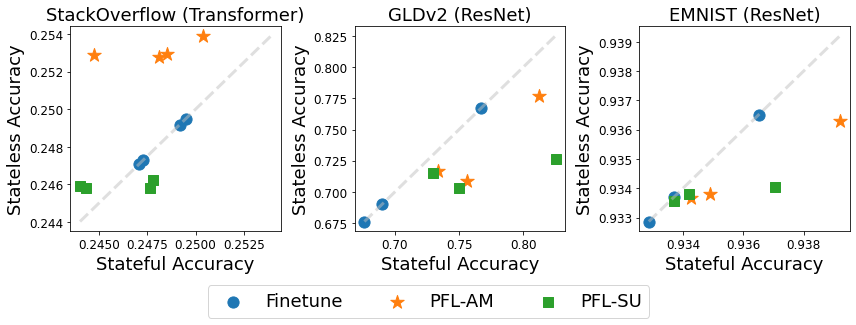

In [177]:
args = dict(
    init = "pretrained", seed=1, ne_finetune=5, ne_pfl=1, 
    use_unweighted_stats = False, finetune_pfl_joint = False,
)

ds_model_list = ["so_mini", "gldv2_resnetgn", "emnist_resnetgn"]
n_plots = len(ds_model_list)

df_stateful_lst = [utils.get_main_pertask_table_mean(ds_and_model, state="stateful", **args) for ds_and_model in ds_model_list]
df_stateless_lst = [utils.get_main_pertask_table_mean(ds_and_model, state="stateless", **args) for ds_and_model in ds_model_list]

styles = [{'color': utils.COLORS[0], 'marker': 'o', 's':125},
    {'color': utils.COLORS[1], 'marker': '*', 's': 200},
    {'color': utils.COLORS[2], 'marker': 's', 's': 100}
]

f, ax = plt.subplots(1, n_plots, figsize=(4*n_plots, 4))
for i in range(n_plots):
    df1 = df_stateful_lst[i].drop(index=["pretrained"])
    df2 = df_stateless_lst[i].drop(index=["pretrained"])
    for j, pfl_algo in enumerate(df1.columns):
        ax[i].scatter(df1[pfl_algo], df2[pfl_algo], label=None if i>=1 else utils.pfl_algo_rename_dict[pfl_algo],
            **styles[j])
    # y = x line
    x1 = min(df1.to_numpy().min(), df2.to_numpy().min())
    x2 = max(df1.to_numpy().max(), df2.to_numpy().max())
    ax[i].plot([x1, x2], [x1, x2], alpha=0.5, color='silver', linestyle='dashed')
    ax[i].set_xlabel("Stateful Accuracy")
    ax[i].set_ylabel("Stateless Accuracy")
    ax[i].set_title(utils.dataset_rename_dict[ds_model_list[i]])
lgd = f.legend(loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
        

In [181]:
del df1, df2

# Personalization increase versus #Params

In [187]:
importlib.reload(utils)

<module 'plotting_utils' from '/private/home/pillutla/pfl/plotting/plotting_utils.py'>

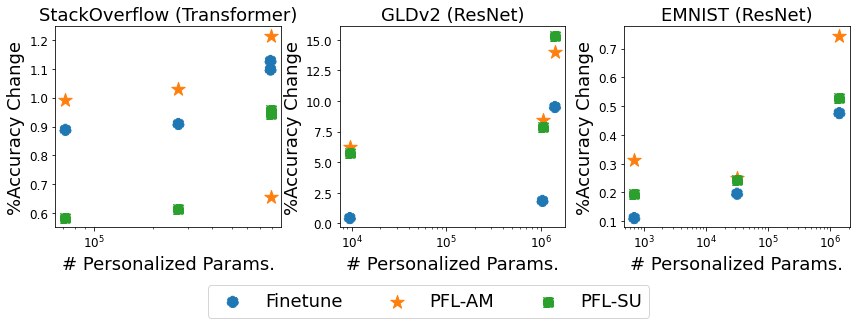

In [189]:
args = dict(
    init = "pretrained", state="stateful", seed=1, ne_finetune=5, ne_pfl=1, 
    use_unweighted_stats = False, finetune_pfl_joint = False,
)

styles = [{'color': utils.COLORS[0], 'marker': 'o', 's':125, 'linestyle':"dashed"},
    {'color': utils.COLORS[1], 'marker': '*', 's': 200, 'linestyle': 'solid'},
    {'color': utils.COLORS[2], 'marker': 's', 's': 100, 'linestyle': 'dashdot'}
]

ds_model_list = ["so_mini", "gldv2_resnetgn", "emnist_resnetgn"]
n_plots = len(ds_model_list)

df_lst = [utils.get_main_pertask_table_mean(ds_and_model, **args) for ds_and_model in ds_model_list]
num_params_all = utils.get_num_params()

f, ax = plt.subplots(1, n_plots, figsize=(4*n_plots, 4))
for i in range(n_plots):
    df = df_lst[i]
    pretrained_val = df.at["pretrained", df.columns.to_list()[0]]
    df = df.drop(index=["pretrained"])
    num_params = pd.Series(num_params_all[ds_model_list[i]])
    for j, pfl_algo in enumerate(df.columns):
        ax[i].scatter(num_params[df.index.to_numpy()], 100*(df[pfl_algo] - pretrained_val),
            label=None if i>=1 else utils.pfl_algo_rename_dict[pfl_algo],
            **styles[j])
        ax[i].set_xscale('log')
    ax[i].set_xlabel("# Personalized Params.")
    ax[i].set_ylabel("%Accuracy Change")
    ax[i].set_title(utils.dataset_rename_dict[ds_model_list[i]])
lgd = f.legend(loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
        

# Per-client statistics

In [225]:
importlib.reload(utils)

<module 'plotting_utils' from '/private/home/pillutla/pfl/plotting/plotting_utils.py'>

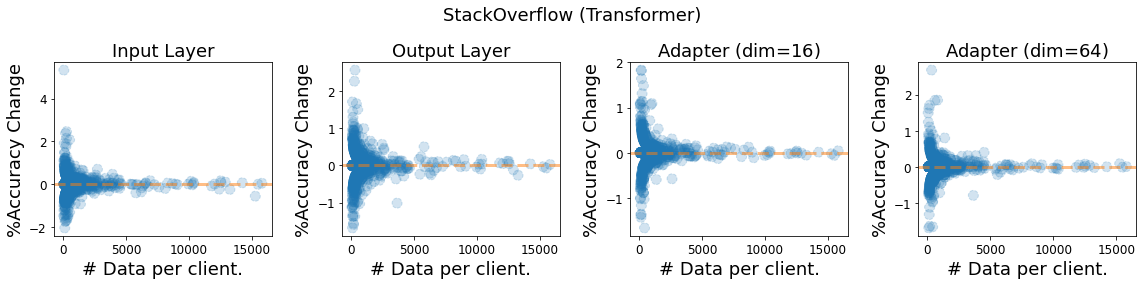

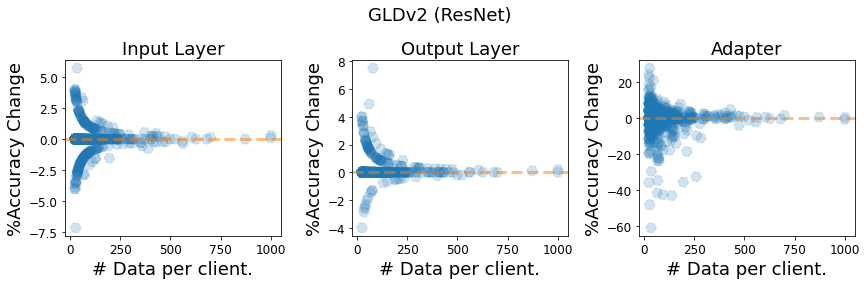

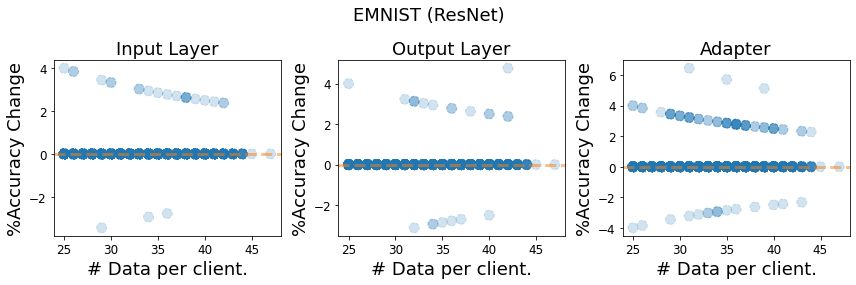

In [206]:
ds_model_list = ["so_mini", "gldv2_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", seed=1, num_epochs_finetune=1,
)
pfl_algo = "pfl_alternating"
metric_name = 'accuracy'
min_is_best = False

for ds_and_model in ds_model_list:
    utils.per_user_stats_scatter_plot(ds_and_model, pfl_algo, args, metric_name, min_is_best)


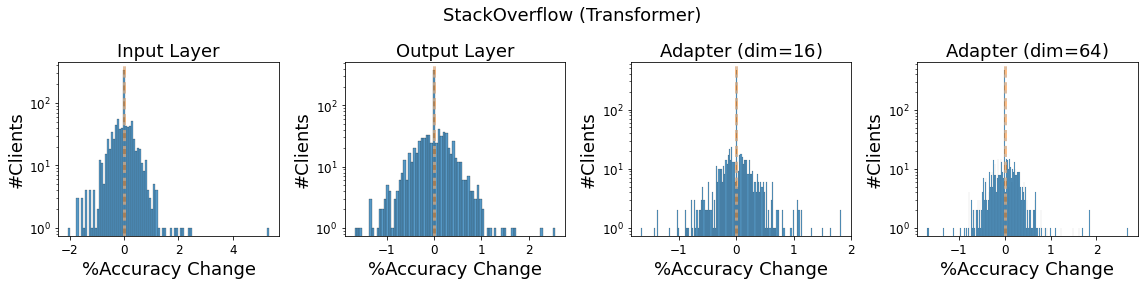

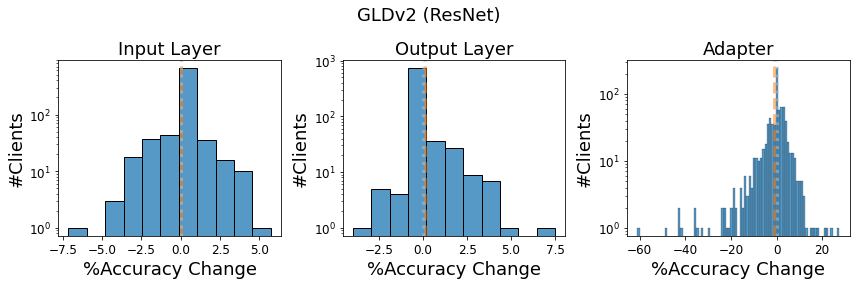

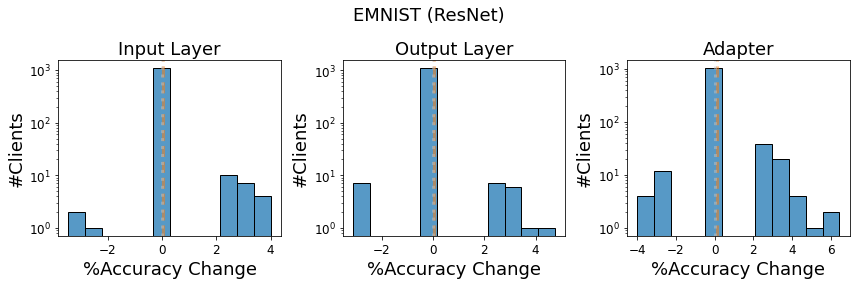

In [226]:
ds_model_list = ["so_mini", "gldv2_resnetgn", "emnist_resnetgn"]
args = dict(
    init = "pretrained", state="stateful", seed=1, num_epochs_finetune=1,
)
pfl_algo = "pfl_alternating"
metric_name = 'accuracy'
min_is_best = False

for ds_and_model in ds_model_list:
    utils.per_user_stats_hist_plot(ds_and_model, pfl_algo, args, metric_name, min_is_best)
